# **Analysis of Independent Presidential Candidata Dr. Iitula's Manifesto for 2019  Election Campaign**

### **1. Imports**  https://www.kaggle.com/code/jpandeinge/nlp-analysis-of-pdf-documents/notebook

In [67]:
#!pip install PyPDF2

In [68]:
import PyPDF2
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

### **2. Read our document**

Lets read our pdf for the manifesto using the `PdfFileReader()` function from the PyPDF2 which is a package for extracting document information such as **title, author, number of pages,....**, spliting documents page by page, merging page by page, etc. 

In [69]:
filename = r'Data/sentiment/scsi-pwc-construction-market-monitor-2022.pdf'
open_filename = open(filename, 'rb')

ind_manifesto = PyPDF2.PdfReader(open_filename)


To get the document informtion  ussing the `getDocumentInfo()` function and check the number of pages in our document using the `numPages()` function. There are various useful functions one can use to check other things. See online documentation:[PyPDF2](https://pythonhosted.org/PyPDF2/index.html)

In [70]:
ind_manifesto.metadata

{'/CreationDate': 'D:20220304154731Z',
 '/Creator': 'Adobe InDesign 17.1 (Macintosh)',
 '/ModDate': 'D:20220304154802Z',
 '/Producer': 'Adobe PDF Library 16.0.5',
 '/Trapped': '/False'}

In [71]:
total_pages = len(ind_manifesto.pages)
total_pages

20

From the outputs of our two previous codes, we got the **title** of the document, what OS was used to type the document, when the document was created and modified. And we also got the total number of pages in our document. 

### **3. Lets extract the texts from the pdf file and print it**

We will use a `textract` package to extract our texts from the document.

In [72]:
#!pip install textract

In [73]:
import textract   

Loop throug all the pages in the document and extract the text from it 

In [74]:
count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < total_pages):
    # Get the specified number of pages in the document
    mani_page  = ind_manifesto.pages[count]
    # Process the next page
    count += 1
    # Extract the text from the page
    text += mani_page.extract_text()
   

The `if` statement check if our document returned words from the loop above using the `extractText()` function. This is done since `PyPDF2` cannot read scanned documents. 

In [75]:
if text != '':
    text = text
    
else:
    textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' )    

If the above returns a false, then run the Optical Character Recognition (OCR) `textract` to convert scanned/image based Pdf files to text. See `textract` online documentaion: [textract](https://textract.readthedocs.io/en/stable/python_package.html).

Lets print out our texts to see what it contains which was converted to lower case using the `lower()` function.

In [76]:
#!pip install autocorrect

In [77]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize


def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(text)
print(lower_case)

march 2022scsi/pwc construction market monitor 2022 contents key highlights 01 introduction 02 activity levels 03 market trends 08 market outlook 13 survey methodology 15 contacts 1601 | scsi/pwc construction market monitor 2022 march 2022key highlights construction activity trends in 2021 the top three factors identified as impacting firm activity levels in 2021 were : 1 . shortage of labour for construction projects • 82 % of surveyors say that the availability of trades has decreased 2 . shortage of materials for construction projects 3 . project viability concerns impacting projects • project viability is the # 1 constraint when raising development financesurveying firm forecasts & operational trends • 82 % of surveyors expect to see an increase in workloads over the coming 12 months , a marked change since 2020 , when 51 % of surveyors forecasted a decrease • 53 % of surveyors expect an increase in their firms ’ headcount in the next 12 months , up from 4 % forecasted in 2020 • 69

And clear from seeing the printed text, we only extracted texts from page 2 till last pace. The reason being is that, those pages that we did not extract text from are in image based and we failed to to do. **SOMEONE CAN PERHAPS HELP!!!!.** 

### **4. Clean our *to_lower_case* text variable and return it as a list of keywords.**

From the printed text, it's apparent that our text contains unwanted characters such as spaces, punctuations `\n` and so forth. 

Lets break our text phrases into individual words using `word_tokenize()` function from the Naturalge Toolkit (nltk).

In [78]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [79]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [80]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

# lets print out the output from our function above and see how the data looks like
clean_data = ' '.join(lemmatized_word)
print(clean_data)

march construction market monitor content key highlight introduction activity level market trend market outlook survey methodology contact construction market monitor march highlight construction activity trend top three factor identified impacting firm activity level shortage labour construction project surveyor say availability trade decreased shortage material construction project project viability concern impacting project project viability constraint raising development financesurveying firm forecast operational trend surveyor expect see increase workload coming month marked change since surveyor forecasted decrease surveyor expect increase firm headcount next month forecasted surveying firm currently operating full capacity surveyor expect see increase profit marginssectoral project trend surveyor report construction project circular economy principle life cycle costing factored construction process surveyor say organisation impacted brexit supply chain delay increased cost const

In [81]:
import pandas as pd


Lets save our data into a dataframe so we can do our anal

In [82]:
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['Itula']
df

,script
Itula,march construction market monitor content key ...


###  **5. Preprocess - Bag of Words model** 

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision [Wikipedia](https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/).


It is mostly used to extract features from text for used in modelling, such as machine learning algorithms.

In [83]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

Applt the document-term matrix which is a mathematical matrix which decribes the frequency of words in a document

In [84]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

C:\Users\sclifford\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,ability,access,according,acknowledges,action,active,activity,acute,add,addition,...,whilst,wide,witnessed,work,worker,working,workload,workshop,year,yearly
Itula,2,3,4,1,2,1,31,2,1,1,...,1,1,1,9,1,2,13,1,13,1


Our vector representations show the frequency of words used in the document

In [85]:
data = data_vect_feat.transpose()
data

,Itula
ability,2
access,3
according,4
acknowledges,1
action,2
...,...
working,2
workload,13
workshop,1
year,13


### **6. Getting the top 100 frequent words from the manifesto.**

We will try to get the top most common 100 words from our document and plot that into a wordcloud for visualization.

In [86]:
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 1000 words written in the manifesto
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))
    

key Itula, value [('construction', 81), ('surveyor', 47), ('sector', 42), ('increase', 31), ('project', 31), ('activity', 31), ('market', 30), ('monitor', 24), ('firm', 24), ('level', 21), ('march', 20), ('respondent', 18), ('ireland', 18), ('supply', 16), ('development', 15), ('report', 14), ('number', 14), ('price', 14), ('headcount', 13), ('month', 13), ('january', 13), ('public', 13), ('new', 13), ('workload', 13), ('year', 13), ('capacity', 12), ('survey', 12), ('labour', 12), ('material', 12), ('industry', 12), ('trend', 12), ('profit', 11), ('housing', 11), ('demand', 11), ('brexit', 11), ('shortage', 11), ('impact', 11), ('positive', 11), ('chart', 11), ('pwc', 10), ('output', 10), ('cost', 10), ('retrofit', 10), ('challenge', 10), ('margin', 10), ('national', 9), ('irish', 9), ('bank', 9), ('skill', 9), ('operating', 9), ('overall', 9), ('building', 9), ('central', 9), ('work', 9), ('scsi', 8), ('technology', 8), ('completion', 8), ('outlook', 8), ('plan', 8), ('sentiment', 8)

In [87]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 100 words for each comedian
words = []
for president in data:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)

print(words[:10])

['construction', 'surveyor', 'sector', 'increase', 'project', 'activity', 'market', 'monitor', 'firm', 'level']


In [88]:
#pip install wordcloud

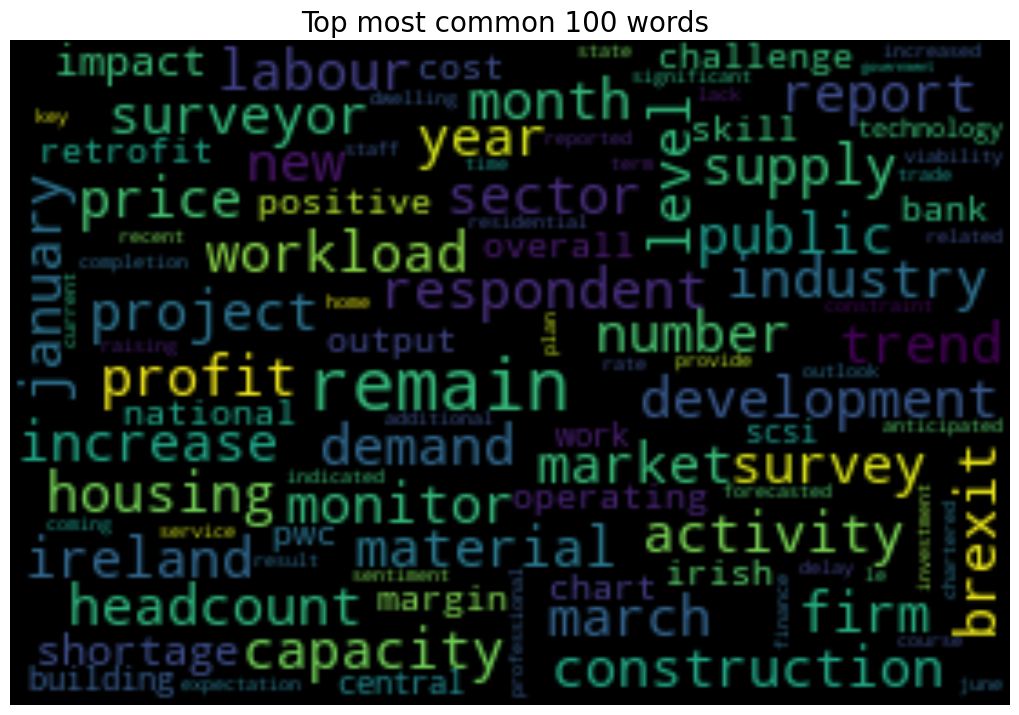

In [89]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk

# Image used in which our world cloud output will be
img1 = imageio.imread(r"C:\Users\sclifford\OneDrive - Gallarus Industry Solutions\MscDataAnalytics\MScDataAnalyticsCA2\Data\sentiment\itula.jpeg")
hcmask1 = img1

# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black',mask=hcmask1,max_font_size=20).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words ",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('Manifesto_top_100.jpeg')

### **7. Sentiment Analysis of the Manifesto**

This is a set of Natural Language Processing (NLP) technique of analysing, identifying and categorizing opinions expressed in a piece of text, in order to determine whether the writer's attitude towards a particular topic, product, politics, services, brands etc. is positive, negative, or neutral. This data holds immense value in the fields of marketing analysis, public relations, product reviews, net promoter scoring, product feedback, and customer service, for example.

In [90]:
#!pip install vaderSentiment

In [91]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

Lets decide  which model we should use, between **TextBlob** and **VADER** for analysis of our text. We will therefore use TextBlob for its simplcity, and since VADER is specifically for analysis of social media data.  

#### **7.1 TextBlob function - returns two properties**

**Polarity:** a float value which ranges from [-1.0 to 1.0] where 0 indicates neutral, +1 indicates most positive statement and -1 rindicates  most negative statement.

**Subjectivity:** a float value which ranges from [0.0 to 1.0] where 0.0 is most objective while 1.0 is most subjective. Subjective sentence expresses some personal opinios, views, beliefs, emotions, allegations, desires, beliefs, suspicions, and speculations where as objective refers to factual information.

In [100]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.06867968870396057, subjectivity=0.3821710517098868)

We can see that the polarity is **0.07** which means that the document is **neutral** and **0.47** subjectivity refers almost factual information in the document rather than public opinions, beliefs and so forth.

In [105]:
#create plotly gauge chart for sentiment
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = blob.sentiment.polarity,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Sentiment Polarity"},
    gauge = {'axis': {'range': [-1, 1]},
                'steps' : [
                {'range': [-1, -0.5], 'color': "red"},
                {'range': [-0.5, 0.5], 'color': "lightgrey"},
                {'range': [0.5, 1], 'color': "lightgreen"}],
                'threshold' : {'line': {'color': "black", 'width': 4}, 'thickness': 0.75, 'value': blob.sentiment.polarity}}))

fig.show()